In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%cd /home/marti/Documents/GitHub/image3D/HOG/data

/home/marti/Documents/GitHub/image3D/HOG/data


# HOG

We are going to work with Histogram of Oriented Gradients (HOG) feature descriptor from Dalal and Triggs. The main purpose of this exercise is to discover the insights of this technique.

In the folder called `data` you will find 4 basic images: vertical and horizontal blocks, square and a circle.

We will follow next steps:
1. Load an image.
2. Calculate the gradient on both axis and visualize the results.
3. Calculate two images: one with the magnitude and another with direction of the gradient.
4. Transform the two images to an histogram of 9 bins `[0, 20, 40, 60, 80, 100, 120, 140, 160]`
6. Visualize the histogram and save it.

You have to compare the results you obtained with the different ROIs of the basic images, save each histogram as a figure.

## Steps

### 1

Load an image and visualize it.


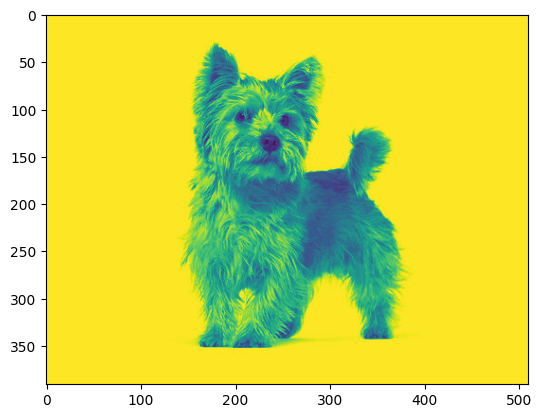

In [37]:
img = cv2.imread("dog.jpg",0)
plt.imshow(img)
plt.show()

###  2. 

To calculate the gradient on both axis we can use the **Sobel Operator**. It uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. See [Formulation](https://en.wikipedia.org/wiki/Sobel_operator) section for more details.

To visualize the results you can use the `convertScaleAbs` function of `cv2` that scales, calculates absolute values, and converts the result to 8-bit. 


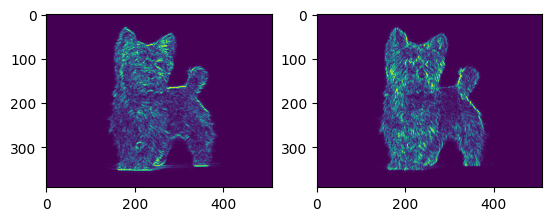

In [38]:
# TODO
gx = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
gy = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

## gx and gy are the gradient images on both directions
grad_x = cv2.convertScaleAbs(gx)
grad_y = cv2.convertScaleAbs(gy)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(grad_y); # vertical gradient image
ax2.imshow(grad_x); # horizontal gradient image


### 3.

Calculate the direction and magnitude of the gradient by using `cartToPolar` function of `cv2` library, it  calculates the magnitude and angle of 2D vectors. 


**Note**: It is easier to work with angles in degrees.


$$||G||=\sqrt{G_x^2+G_y^2}$$

$$\theta = arctan(\dfrac{G_y}{G_x})$$

![title](gxgy.png)


/tmp/ipykernel_8111/1343016426.py:5: RuntimeWarning: invalid value encountered in sqrt
  mag = np.sqrt(np.power(gx,2)+np.power(gy,2))
/tmp/ipykernel_8111/1343016426.py:6: RuntimeWarning: divide by zero encountered in divide
  theta = np.arctan(gy/gx)
/tmp/ipykernel_8111/1343016426.py:6: RuntimeWarning: invalid value encountered in divide
  theta = np.arctan(gy/gx)


(391, 510)
(391, 510)


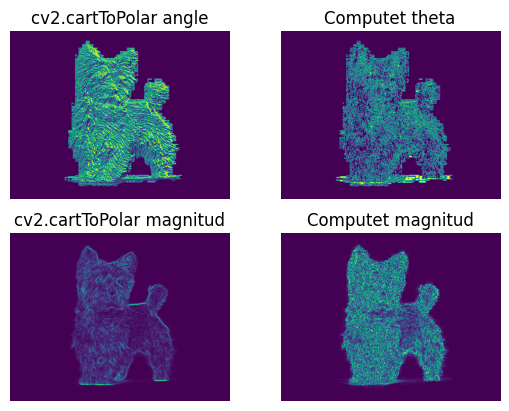

In [75]:
# TODO

# I should be having the same values computed here right? 
# It's just a conversion to polar
mag = np.sqrt(np.power(gx,2)+np.power(gy,2))
theta = np.arctan(gy/gx)

# Getting just a tone of nan for theta, 
# gessing there are not the interesting parts of the image

# print(img.shape)  # Same shape and use the same astype
# print(theta.shape)

# Just using the gradient as a normal x and y axis and then
# computing the Polar (which has magnitud and an angle as representation)
magnitude, angle = cv2.cartToPolar(gx.astype(float),gy.astype(float))

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

ax1.set_title('cv2.cartToPolar angle')
ax2.set_title('Computet theta')
ax1.imshow(angle)
ax2.imshow(cv2.convertScaleAbs(theta))
ax3.set_title('cv2.cartToPolar magnitud')
ax4.set_title('Computet magnitud')
ax3.imshow(magnitude)
ax4.imshow(cv2.convertScaleAbs(mag))
plt.show()

### 4

Construct a 9-bin histogram using the results of the previous steps

Text(0.5, 1.0, 'HOG')

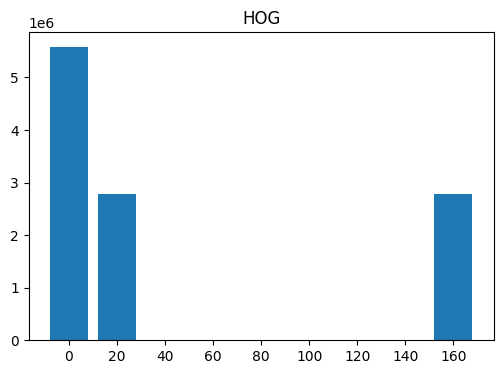

In [83]:
hist = np.zeros((9))

# TODO: histogram construction

# Visualization         

labels = np.asarray([i for i in range(0, 180, 20)])

for x in range(magnitude.shape[0]):
    for y in range(magnitude.shape[1]):
        for i in range(len(labels)):
            # Check the last one
            if labels[len(labels)-1] > angle[x][y] and i==(len(labels)-1):
                hist[0]+=magnitude[x][y]/2
                hist[len(labels)-1]+=magnitude[x][y]/2
            # Check exact ones
            elif angle[x][y]==labels[i]:
                hist[i]+=magnitude[x][y]
            # Check the in the in between values
            elif angle[x][y]>labels[i] and angle[x][y]<labels[(i+1)%len(labels)]:
                hist[i]+=magnitude[x][y]/2
                hist[(i+1)%len(labels)] += magnitude[x][y]/2


fig, ax = plt.subplots(figsize = (6,4))
ax.bar(range(0,9), hist)
ax.set_xticks(np.asarray(range(0,9)))
ax.set_xticklabels(labels)
plt.title("HOG")


### 5

Save the histogram

In [6]:
# TODO
# No

## More work!

Try the example of the HoG descriptor of the Scikit-image library using  the images of this exercise: [link](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)